# Detecting nozzle positions

## Initialization

In [ ]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [ ]:
# global packages
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# local packages
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
from py.im.imshow import imshow
import py.vid.noz_detect as nt
import py.file.file_handling as fh
import py.im.morph as vm

# logging
LOGGERDEFINED = logs.openLog('nozzle_detect.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# export all nozzles

In [ ]:
nloop = nt.exportNozDimsRecursive([os.path.join(cfg.path.server, r'SDT', s) for s in ['SO_S20-0.5', 'SO_S85-0.05']]
                                      , overwrite=False, diag=0)

In [ ]:
nloop.exportErrors(os.path.join(cfg.path.fig, 'SDT', 'errors', 'nozErrors.csv'))

In [ ]:
len(nloop.folderErrorList)

In [ ]:
folder = nloop.folderErrorList[8]['folder']
nt.exportNozDims(folder, diag=2, overwrite=True)

In [ ]:
fh.openExplorer(folder)

# fix backgrounds

In [ ]:
df = nt.findBadBackgrounds(os.path.join(cfg.path.server, 'SDT'), os.path.join(cfg.path.fig, 'SDT', 'errors'))

In [ ]:
len(df)

In [ ]:
df

In [ ]:
for i in [1000]:
    print(i)
    nt.fixBackground(df.loc[i, 'folder'], diag=1)

In [ ]:
nt.fixBackground(os.path.join(cfg.path.server, r'SDT\SO\I_SO10_S_3.50\I_SO10_S_3.50_230208\disturbHoriz3_1_1.250'), diag=1)

# detect one nozzle

In [ ]:
fh.openExplorer(folder)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S85-0.05\I_SO10-S85-0.05_S_3.50\I_SO10-S85-0.05_S_3.50_230516\disturbXS2_1_+z_0.750\disturbXS2_1_+z_0.750_nozDims_I_SO10-S85-0.05_S_3.50_230516_154046_2.csv


{'xL': 338, 'xR': 402, 'yB': 270}

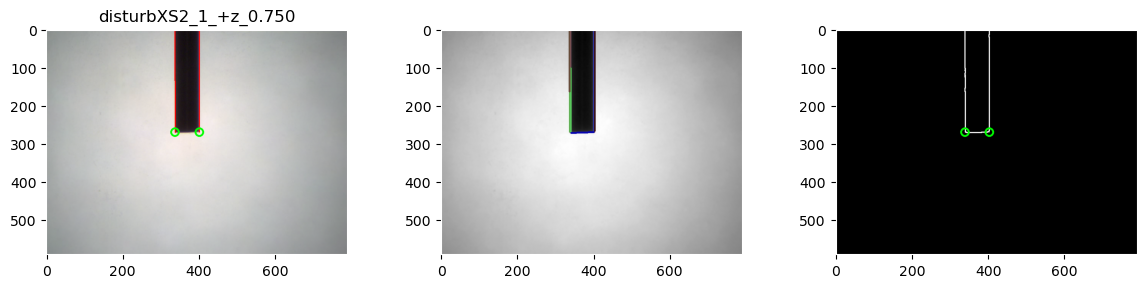

In [6]:
folder = os.path.join(cfg.path.server, r'SDT\SO_S85-0.05\I_SO10-S85-0.05_S_3.50\I_SO10-S85-0.05_S_3.50_230516\disturbXS2_1_+z_0.750')
nv = nt.nozData(folder)
nv.detectNozzle(diag=2, overwrite=True, export=True)
nv.nozDims()

In [ ]:
folder = os.path.join(cfg.path.server, r'SDT\SO\I_SO11_S_3.00\I_SO11_S_3.00_230214\disturbXS2_2_+z_0.500')
nv = nt.nozData(folder)
nv.exportBackground(diag=2, overwrite=False)

In [ ]:
run ../../tests/test_nozDetect